In [18]:
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [19]:
import pandas as pd 

In [20]:
df = pd.read_csv('datasets/imigrantes_canada.csv')

In [21]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [22]:
df.set_index('País',inplace=True)

In [23]:
anos = list(map(str, range(1980,2014)))

In [24]:
brasil = df.loc['Brasil',anos]

In [25]:
brasil_dict = {'ano': brasil.index.tolist(),'imigrantes':brasil.values.tolist()}

In [26]:
dados_brasil = pd.DataFrame(brasil_dict)

In [27]:
import matplotlib.pyplot as plt 

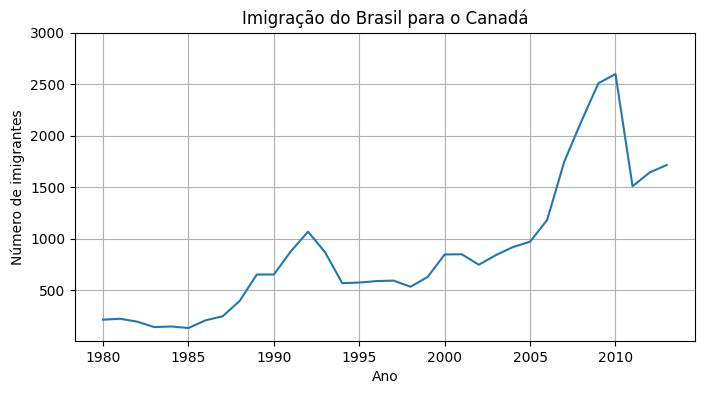

In [28]:
plt.figure(figsize=(8,4))
# 1 polegada 2.54 cm
# largura 8 = 20.32
#altura 4 = 10.16
#DPI (dots per inch, ou pontos por polegada)
#padrão no matplotlib - DPI = 100
# Largura: 8 polegadas x 100 DPI = 800 pixels
# Altura : 4 polegadas x 100 DPI = 400 pixels
plt.plot(dados_brasil['ano'],dados_brasil['imigrantes'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010',])
plt.yticks([500,1000,1500,2000,2500,3000])
plt.grid()
plt.title("Imigração do Brasil para o Canadá")
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.show()

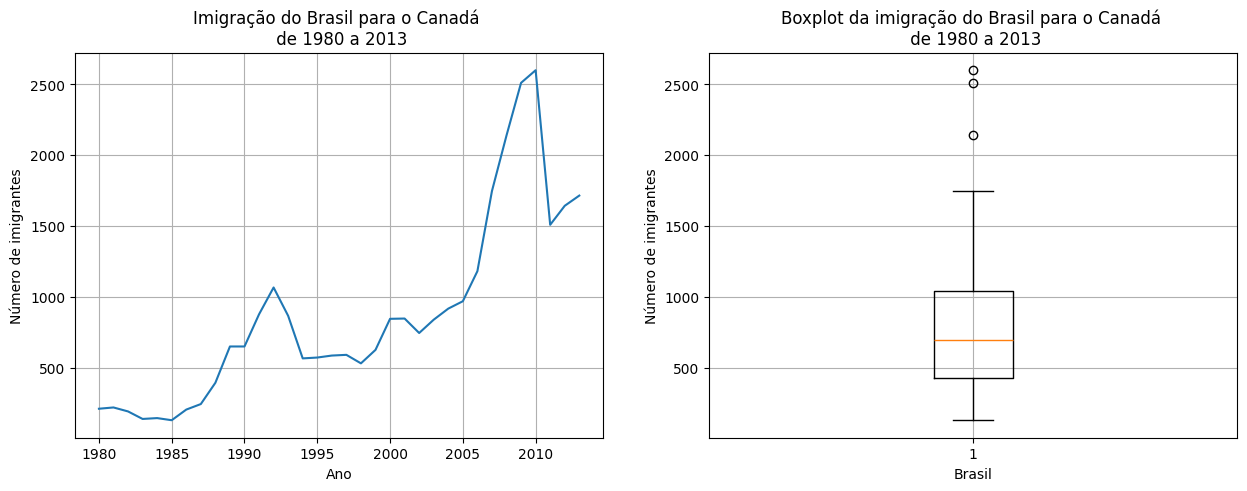

In [29]:
# Criando uma figura 
fig,axs =plt.subplots(1,2,figsize=(15,5))
# Subplot : 1 Gráfico de linha
axs[0].plot(dados_brasil['ano'],dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá \n de 1980 a 2013')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].grid()


#Subplot: 2 Gráfico Boxplot
axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title("Boxplot da imigração do Brasil para o Canadá \n de 1980 a 2013")
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()
plt.show()

In [30]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


Comparativo de imigrações do Brasil com alguns paises da America Latina

Text(0.5, 0.98, 'Imigração na América Latina')

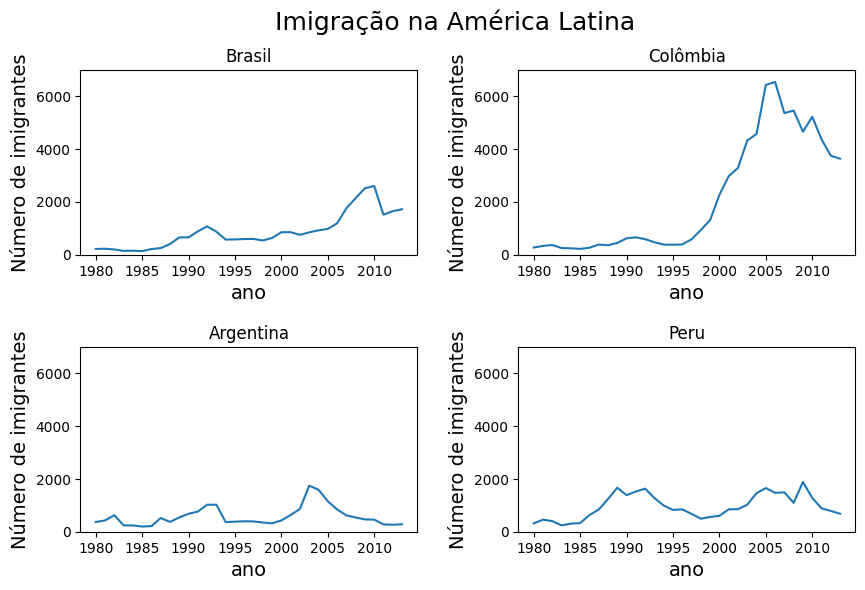

In [31]:
# Criar uma figura

fig, axs = plt.subplots(2,2,figsize=(10,6))

fig.subplots_adjust(hspace=0.5,wspace=0.3)

#Subplots
#Brasil
axs[0,0].plot(df.loc['Brasil',anos])
axs[0,0].set_title('Brasil')
#Colômbia
axs[0,1].plot(df.loc['Colômbia',anos])
axs[0,1].set_title('Colômbia')
#Argentina
axs[1,0].plot(df.loc['Argentina',anos])
axs[1,0].set_title('Argentina')
#Peru
axs[1,1].plot(df.loc['Peru',anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))


for ax in axs.flat:
    ax.set_xlabel("ano",fontsize=14)
    ax.set_ylabel("Número de imigrantes",fontsize=14)



ymin = 0
ymax = 7000

for ax in axs.ravel():
    ax.set_ylim(ymin,ymax)


#Aula 3 aqui

fig.suptitle("Imigração na América Latina",fontsize=18)
# Customizando o Matplitlib (cores, fontes, bordas)

# exercicio - verifique na documentação do matplitlib

- Função ravel()
achata um array multidimensional em uma unica dimensao, isso significa que ela transforma um array de qualquer forma em um array unidimensional 

- Função set_ylim()
definir os limite de visualização do eixo y em um grafico isso permite que voce controle a faixa de valores no eixo y

- Função set_xlim()
definir os limite de visualização do eixo x em um grafico isso permite que voce controle a faixa de valores no eixo x

# Mudando Várias cores

In [32]:
america_sul = df.query("Região == 'América do Sul'")

In [33]:
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


In [35]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

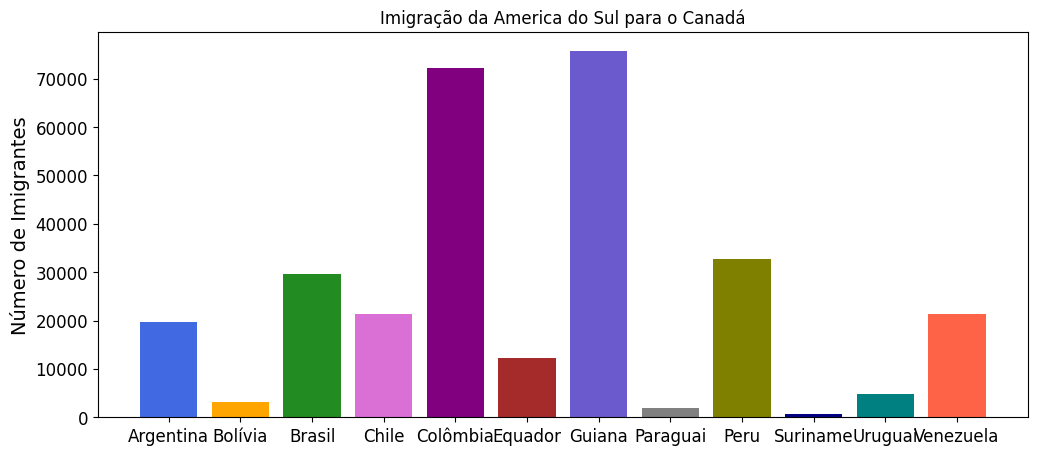

In [36]:
fig,ax = plt.subplots(figsize=(12,5))
ax.bar(america_sul.index,america_sul['Total'],color=cores)
ax.set_title('Imigração da America do Sul para o Canadá')
ax.set_xlabel('')
ax.set_ylabel('Número de Imigrantes',fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

In [37]:
for cor in cores:
    print (cor)

royalblue
orange
forestgreen
orchid
purple
brown
slateblue
gray
olive
navy
teal
tomato


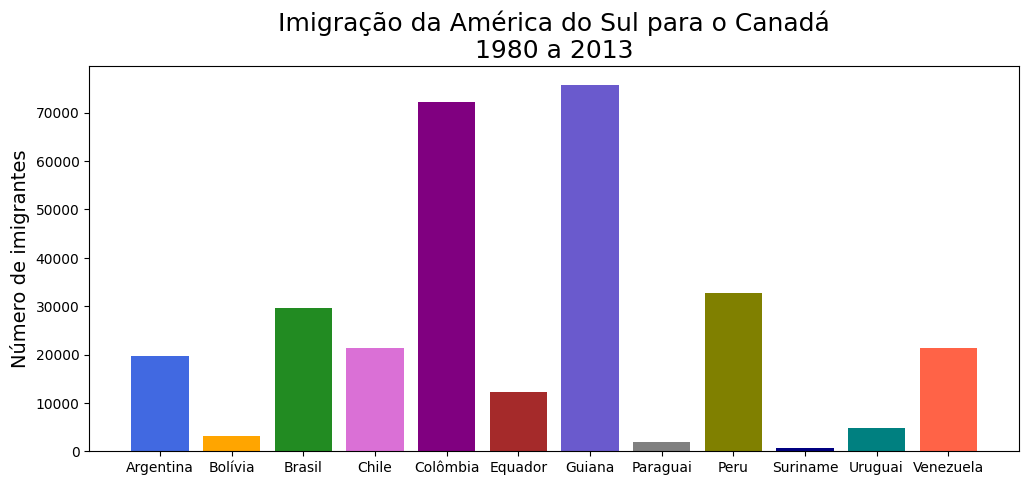

In [38]:
# criando uma variável fig para a figura
# ax é variável que representa o gráfico (eixos, valores ...)
fig, ax = plt.subplots(figsize=(12, 5))
# É um gráfico de bar (Matplolib)
ax.bar(america_sul.index, america_sul['Total'], color=cores)
# Título alinha a esquerda com fonte 18
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013',fontsize=18)
# eixo y com fonte 14
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('')
# Mudar as fontes dos ticks
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

plt.show()